In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:
label=LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i]=label.fit_transform(df[i])

df.dropna(inplace=True)
df


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [9]:
x=df.drop("Schooling",axis=1)
y=df["Schooling"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources
1014,65,2011,1,61.2,263.0,40,1.64,225.221947,91.0,120,...,58,91.0,4.81,91.0,1.3,1574.978653,25121796.0,6.9,6.8,0.554
93,5,2002,1,74.1,138.0,12,7.81,470.186915,66.0,0,...,13,94.0,8.31,93.0,0.1,2579.193168,3788937.0,1.2,1.0,0.776
2015,132,2007,1,74.0,133.0,11,4.29,516.403702,93.0,0,...,15,93.0,4.60,93.0,0.3,3611.214700,28292724.0,1.2,1.2,0.696
2929,192,2008,1,48.2,632.0,30,3.56,20.843429,75.0,0,...,46,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421
2583,169,2001,1,71.2,194.0,17,5.92,176.062520,95.0,7319,...,20,97.0,3.32,96.0,0.8,1893.145377,63543322.0,9.3,9.6,0.649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,127,2006,1,64.2,179.0,365,0.03,40.368300,78.0,7641,...,458,77.0,3.40,78.0,0.1,873.772727,15793993.0,21.0,21.5,0.501
2223,147,2009,1,65.8,21.0,0,4.13,11.136087,98.0,0,...,0,99.0,6.65,98.0,0.9,199.571460,17813.0,6.3,6.2,0.533
1528,97,2009,0,72.2,192.0,0,12.40,1446.529217,95.0,0,...,0,98.0,7.53,98.0,0.1,11837.391300,3162916.0,2.8,2.9,0.825
2576,169,2008,1,73.5,162.0,11,5.92,609.951163,98.0,7790,...,13,99.0,3.92,99.0,0.3,4378.687460,6654576.0,8.5,8.6,0.700


In [11]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [12]:
y_pred=model.predict(x_test)
y_pred

array([10.8, 13.7, 16.4, 11.6,  6.6,  9.9, 12.3, 13.1, 16.5, 11.3, 15.2,
       13.2, 16. , 10.7, 10.3, 11.3, 15.7, 16.1, 13.4, 12.7, 16.8, 13.4,
       13. , 13.4, 10.4, 13.8, 14.4, 13.4, 18.6, 11.7,  9.5, 12.8,  9.7,
       16.4, 14.1, 14.6, 11.3,  8.7, 10.7, 15.5, 11.1, 16.8, 13. , 10.7,
       15.2, 10.7, 12.9, 12.3, 11.4, 13.6,  7.6, 10.9, 10.6, 12.6, 16.2,
        5.2, 13.6, 14.7, 12.7,  7.7,  4.9,  6.7, 12.7, 12.5, 13.3, 14.4,
        8.4, 14.6, 13. , 11.4, 13.2, 12.5, 12.8,  7.9, 13.4, 14.6, 10.9,
        7.7, 16.2, 18.8, 11.7, 12.9, 15.9, 11.5, 10.3, 13.2, 12.1,  7.8,
       12.1,  9.7, 12.1, 14.7, 14.6, 11.1, 15.4, 12.4, 10.4, 13.2, 15.6,
       11.3, 11.3, 14.7, 12.3,  7.5, 13.8, 13.3, 16.1, 15.1,  6.4, 12.1,
       12.5, 10.7, 15.2, 11.9, 13.7, 13.8, 10.6, 12.6, 11.6,  9.3, 12.9,
        6.2,  8.5, 12.9, 12.9, 16.4, 16.4,  8.6, 10.7,  9.3, 14.8, 12.9,
       12.9, 12.8, 15.7, 15.8, 12.4, 11.8, 12.1, 16.1, 16. , 10.9, 11.7,
        4.4, 10.8, 10.7, 14.3, 13.5, 13.7,  6.2, 13

In [13]:
msc=mean_squared_error(y_test,y_pred)
print(f"mean_squared_error:{msc}")

rmsc=np.sqrt(msc)
print(f"sqrt:{rmsc}")

mean_squared_error:0.7311212121212121
sqrt:0.8550562625472151


In [14]:
score=r2_score(y_test,y_pred)
score

0.9014936232236469

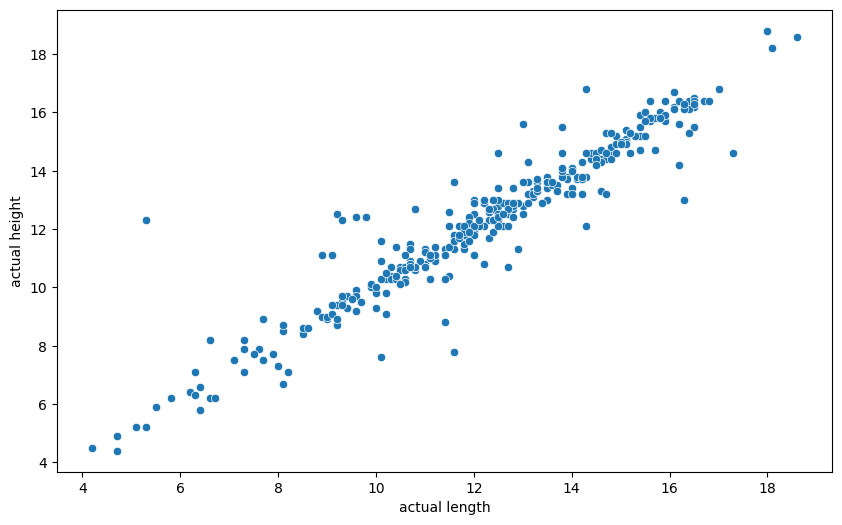

In [15]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("actual length")
plt.ylabel("actual height")
plt.show()